In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

print("Libs loaded.")

Libs loaded.


In [2]:
import random
data = pd.read_csv(r"position_salaries.csv", sep=' ', usecols=['Position','Level','Salary'])
data

,Position,Level,Salary
0,Business_Analyst,1,45000
1,Junior_Consultant,2,50000
2,Senior_Consultant,3,60000
3,Manager,4,80000
4,Country_Manager,5,110000
5,Region_Manager,6,150000
6,Partner,7,200000
7,Senior_Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
data.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [4]:
X = data.drop(["Position","Salary"], axis = 1)
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y = data.drop(["Position", "Level"], axis=1)
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


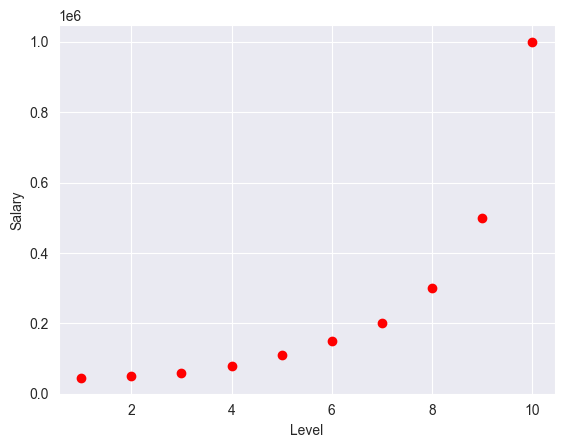

In [6]:
plt.scatter(X, y , label="Distribution", color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [7]:
# X_seq = np.linspace(X.min(),X.max(),300).reshape(1, -1) # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# print(X_seq)

In [8]:
# degree = 9
# polyn_reg = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression()) # https://www.geeksforgeeks.org/make_pipeline-function-in-sklearn/
# # https://www.geeksforgeeks.org/what-is-the-difference-between-pipeline-and-make_pipeline-in-scikit/
# polyn_reg.fit(X, y)

Why is polynomial regression considered a special case of multiple linear regression?

https://www.quora.com/Why-is-polynomial-regression-considered-a-kind-of-linear-regression
https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres

In [9]:
degree = 3
poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)
print(X_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_poly , y, test_size = 0.10)

In [11]:
polyn_reg = LinearRegression()
polyn_reg = polyn_reg.fit(X_train, y_train)

In [12]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)

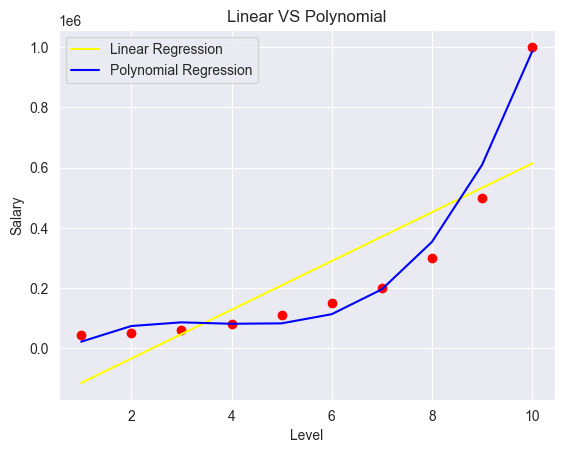

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), label = "Linear Regression", color = 'yellow')
plt.plot(X, polyn_reg.predict(X_poly), label = "Polynomial Regression", color = 'blue')
plt.title('Linear VS Polynomial')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()